## Thera Bank Personal Loan Campaign

<b>Data Description</b>:
    
The dataset contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to
them in the earlier campaign.

<b>Domain</b>:
Banking

<b>Context</b>:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). A
campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget.

<b>Data Dictionary</b>:

- ID: Customer ID
- Age: Customer's age in completed years
- Experience: Years of professional experience
- Income: Annual income of the customer
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any.
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Doesthe customer have a securities account with the bank?
- CD Account: Doesthe customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Doesthe customer use a credit card issued by the bank?

## Import Libraries

In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split

## Load and review data

In [9]:
customers = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
customers.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
customers.shape

(5000, 14)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
customers.describe() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
customers.isnull().values.any() 

False

## EDA 

#### Number of unique in each column

In [14]:
for col in customers:
    print(col, " ", customers[col].nunique())

ID   5000
Age   45
Experience   47
Income   162
ZIP Code   467
Family   4
CCAvg   108
Education   3
Mortgage   347
Personal Loan   2
Securities Account   2
CD Account   2
Online   2
CreditCard   2


#### Number of people with zero mortgage

In [11]:
zero_mort = customers.loc[customers['Mortgage'] == 0]
len(zero_mort.index)

3462

#### Number of people with zero credit card spending per month

In [12]:
zero_cc = customers.loc[customers['CCAvg'] == 0]
len(zero_cc.index)

106

#### Value Counts of Categorical Columns

In [50]:
personal_loan_tab = pd.crosstab(index=customers["Personal Loan"],
                     columns="count")                 
personal_loan_tab

col_0,count
Personal Loan,
0,4520
1,480


In [51]:
securities_account_tab = pd.crosstab(index=customers["Securities Account"],
                     columns="count")                 
securities_account_tab

col_0,count
Securities Account,
0,4478
1,522


In [52]:
CD_account_tab = pd.crosstab(index=customers["CD Account"],
                     columns="count")                 
CD_account_tab

col_0,count
CD Account,
0,4698
1,302


In [53]:
online_tab = pd.crosstab(index=customers["Online"],
                     columns="count")                 
online_tab

col_0,count
Online,
0,2016
1,2984


In [54]:
credit_card_tab = pd.crosstab(index=customers["CreditCard"],
                     columns="count")                 
credit_card_tab

col_0,count
CreditCard,
0,3530
1,1470


#### Univariate and Bivariate

In [41]:
customers.groupby(["Personal Loan"]).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


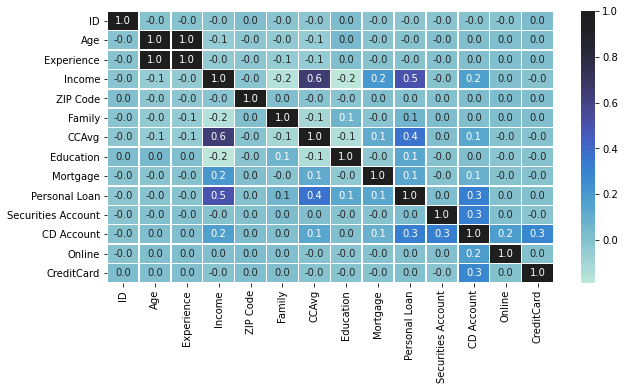

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(customers.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
plt.show()

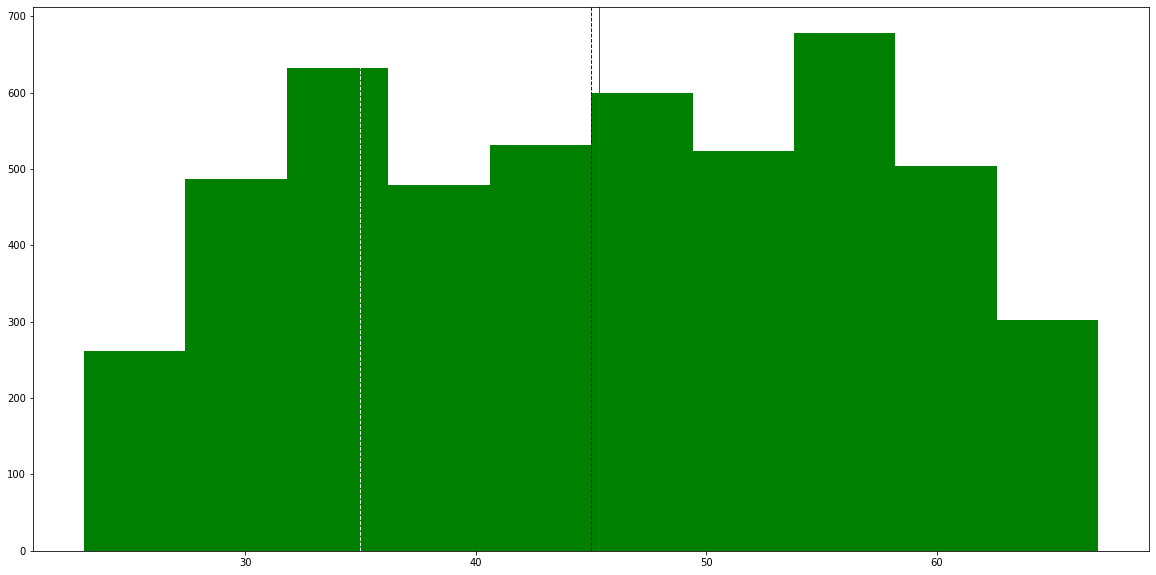

In [66]:
age = customers['Age']
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(age, color='g') # plots a simple histogram
plt.axvline(age.mean(), color='m', linewidth=1)
plt.axvline(age.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(age.mode()[0], color='w', linestyle='dashed', linewidth=1)

<AxesSubplot:xlabel='CCAvg'>

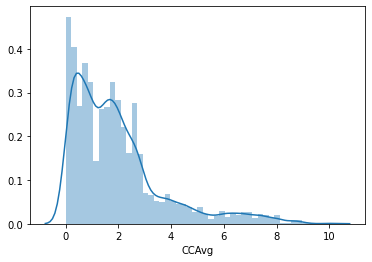

In [67]:
CCAvg = customers['CCAvg']
sns.distplot(CCAvg)

<AxesSubplot:xlabel='Income', ylabel='CCAvg'>

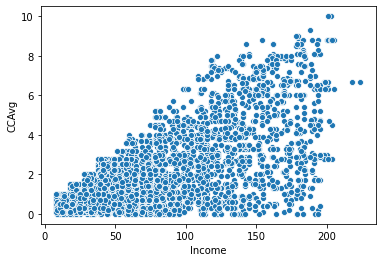

In [27]:
sns.scatterplot(customers['Income'], customers['CCAvg']) 

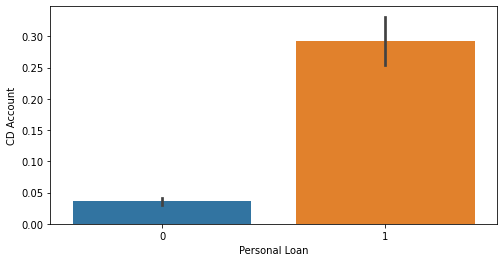

In [41]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Personal Loan", y="CD Account", data=customers)

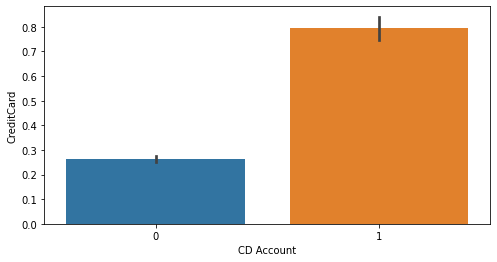

In [37]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="CD Account", y="CreditCard", data=customers)

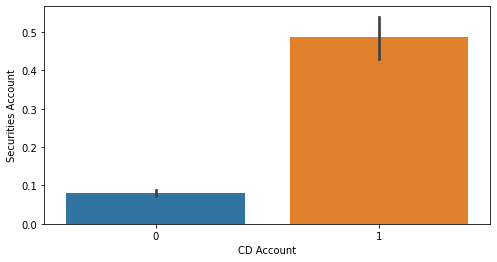

In [38]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="CD Account", y="Securities Account", data=customers)

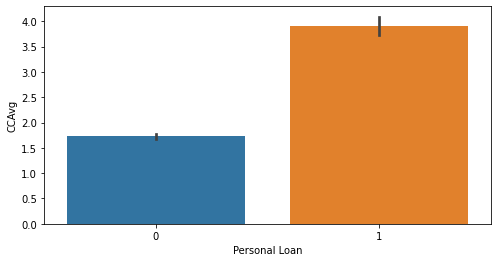

In [40]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Personal Loan", y="CCAvg", data=customers)

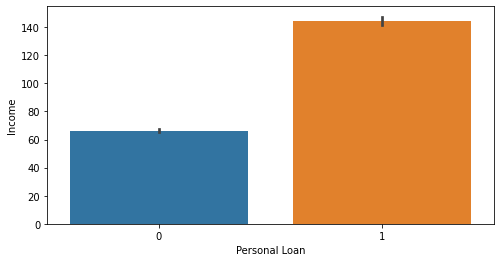

In [42]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Personal Loan", y="Income", data=customers)

## Splitting the data 
We will use 70% of data for training and 30% for testing.

In [11]:
X = customers.drop('Personal Loan',axis=1)     # Predictor feature columns 
Y = customers['Personal Loan']   # Predicted class (1=True, 0=False)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


Check split of the data

In [6]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(customers.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(customers.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Check True/False ratio in split data 

In [7]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(customers.loc[customers['Personal Loan'] == 1]), (len(customers.loc[customers['Personal Loan'] == 1])/len(customers.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(customers.loc[customers['Personal Loan'] == 0]), (len(customers.loc[customers['Personal Loan'] == 0])/len(customers.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



## Logistic Regression

In [12]:
# Fit model on training data
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

# Predict on testing data
y_predict = model.predict(x_test)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Feature: 0, Score: -0.00004
Feature: 1, Score: -0.00058
Feature: 2, Score: -0.00140
Feature: 3, Score: 0.03610
Feature: 4, Score: -0.00006
Feature: 5, Score: 0.00860
Feature: 6, Score: 0.00578
Feature: 7, Score: 0.00935
Feature: 8, Score: 0.00086
Feature: 9, Score: 0.00030
Feature: 10, Score: 0.00269
Feature: 11, Score: -0.00009
Feature: 12, Score: -0.00003


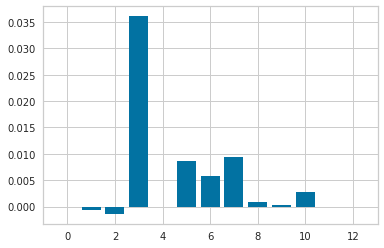

In [13]:
# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Improving Model Performance via Checking Parameters of Logistic Regression

In [14]:
# Checking Parameters of logistic regression
model.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [15]:
# Check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.951, 0.923, 0.909, 0.905, 0.905]

[0.948, 0.921, 0.908, 0.901, 0.901]


In [16]:
train_score=[]
test_score=[]
solver = ['liblinear','saga'] # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i) #changed penalty to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.951, 0.905]

[0.947, 0.901]


In [17]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

Training accuracy 0.8968571428571429

Testing accuracy 0.8906666666666667


In [18]:
# Check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.88, 0.9, 0.898, 0.898, 0.897, 0.897]

[0.879, 0.898, 0.894, 0.893, 0.891, 0.891]


In [19]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Training accuracy 0.8997142857142857

Testing accuracy 0.898

Confusion Matrix


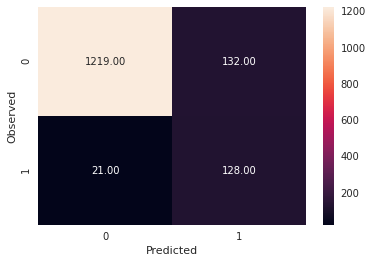

None

Recall: 0.8590604026845637

Precision: 0.49230769230769234

F1 Score: 0.6259168704156479

Roc Auc Score: 0.8806774996398393


In [20]:
# Final model 
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.1) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


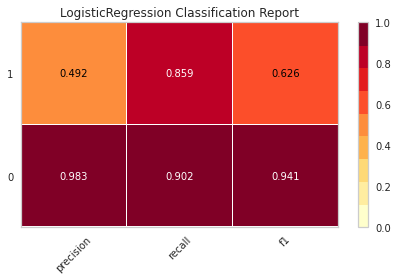

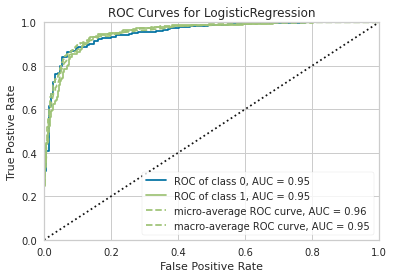

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [22]:
# model performance

viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

## Business Insights

`Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that personal loan will be granted and the customer was eligibile for loan

*False Positive (observed=0,predicted=1):*

Predicted that personal loan will be granted and the customer was not eligibile for loan

*True Negative (observed=0,predicted=0):*

Predicted that personal loan will not be granted and the customer was not eligibile for loan

*False Negative (observed=1,predicted=0):*

Predicted that personal loan will not be granted and the customer was eligibile for loan

The bank wants to give the loan to those who are eligible--the bank doesn't want to lose money on false positives. The false negatives are ok given that the bank wants to keep money more than gain customers who are not eligible for the personal loan.
